In [1]:
%matplotlib inline  

In [98]:
from IPython.core.display import display
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, svm, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from common_lib.rhyme_analizer import get_lyrics_stat
from common_lib.lyrics_database import LyricsDatabase

In [3]:
lyrics_dir = '/data1/nlp-data/ghostwriter/data/top-selling-rappers'
ld = LyricsDatabase(lyrics_dir)
artists = ld.get_artists_names()

In [4]:
def get_artist_style_vector(artist):
    lyrics_files = ld.get_lyrics_files_from_artist(artist)
    print(len(lyrics_files))
    
    stat_list = []
    for lyrics_file in lyrics_files:
        stat = get_lyrics_stat(os.path.join(lyrics_dir, lyrics_file))
        stat_list.append(stat)

    data = pd.DataFrame(stat_list)
    
    result = data.mean(0)
    
    return result

In [5]:
def load_lyrics_parameters():
    results = []
    for artist in artists:
        lyrics_files = ld.get_lyrics_files_from_artist(artist)
        for lyrics_file in lyrics_files:
            stat = get_lyrics_stat(os.path.join(lyrics_dir, lyrics_file))
            stat['artist'] = artist
            results.append(stat)
                                 
            print(artist, lyrics_file)
                                   
    data = pd.DataFrame(results)
    return data

In [6]:
data = load_lyrics_parameters()

lil_wayne lil_wayne-tha_block_is_hot-drop_it_like_it's_hot.txt
lil_wayne lil_wayne-tha_carter-who_wanna.txt
lil_wayne lil_wayne-i_am_not_a_human_being_ii-romance.txt
lil_wayne lil_wayne-tha_carter_ii-feel_me.txt
lil_wayne lil_wayne-tha_carter_iv-it's_good.txt
lil_wayne lil_wayne-one-we_takin'_over_(remix).txt
lil_wayne lil_wayne-tha_block_is_hot-kisha.txt
lil_wayne lil_wayne-tha_carter_iii-phone_home.txt
lil_wayne lil_wayne-the_drought_is_over_pt._4-we_come_and_see_about_it.txt
lil_wayne lil_wayne-tha_carter_iv-so_special.txt
lil_wayne lil_wayne-two-dipset_2.txt
lil_wayne lil_wayne-rise_of_an_empire-we_alright.txt
lil_wayne lil_wayne-tha_carter-snitch.txt
lil_wayne lil_wayne-the_drought_is_over_pt._4-operate_on_me.txt
lil_wayne lil_wayne-the_drought_is_over_5-stunt_when_i_see_you.txt
lil_wayne lil_wayne-tha_carter-ain't_that_a_bitch.txt
lil_wayne lil_wayne-rebirth-runnin.txt
lil_wayne lil_wayne-lights_out-fuck_wit_me_now.txt
lil_wayne lil_wayne-500_degreez-500_degreez.txt
lil_wayne lil

In [30]:
# pd.DataFrame({'mean':data.mean(0), 'std': data.std(0)})
# plt.figure(figsize=(10,10))
# pd.tools.plotting.radviz(data, 'artist')
cleaned_data = data.fillna(0)

In [137]:
X = cleaned_data.drop('artist', axis=1)
Y = cleaned_data['artist']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [154]:
clf1 = linear_model.LogisticRegression(C=1,max_iter=500, solver='lbfgs', multi_class='ovr')
clf2 = neighbors.KNeighborsClassifier()
clf3 = svm.SVC(kernel='poly', degree=3, C=1) # poly linear rbf
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [153]:
y_predict1 = clf1.predict(x_test)
y_predict2 = clf2.predict(x_test)
y_predict3 = clf3.predict(x_test)
print(f1_score(y_test, y_predict1, average='micro'))
print(f1_score(y_test, y_predict2, average='micro'))
print(f1_score(y_test, y_predict3, average='micro'))

0.328629032258
0.260080645161
0.425403225806


In [159]:
artist_one = artists[4]
artist_one_data = cleaned_data[cleaned_data.artist == artist_one].drop('artist', axis=1)

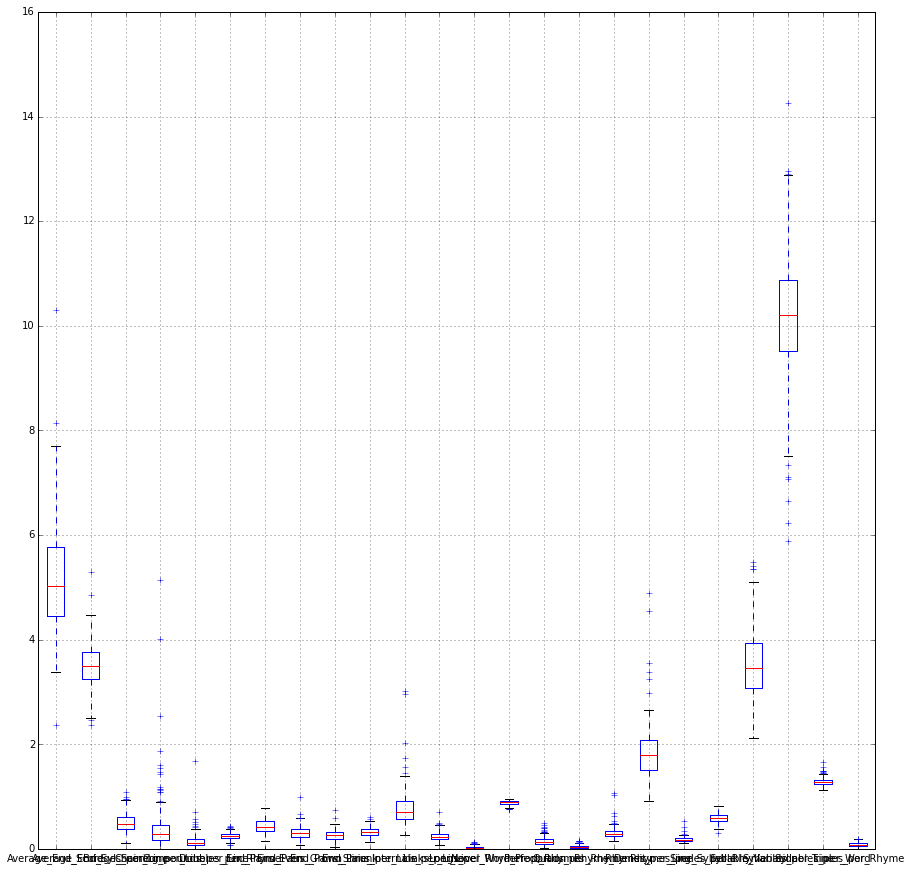

In [168]:
artist_one_data.plot(kind='box', figsize=(15,15))